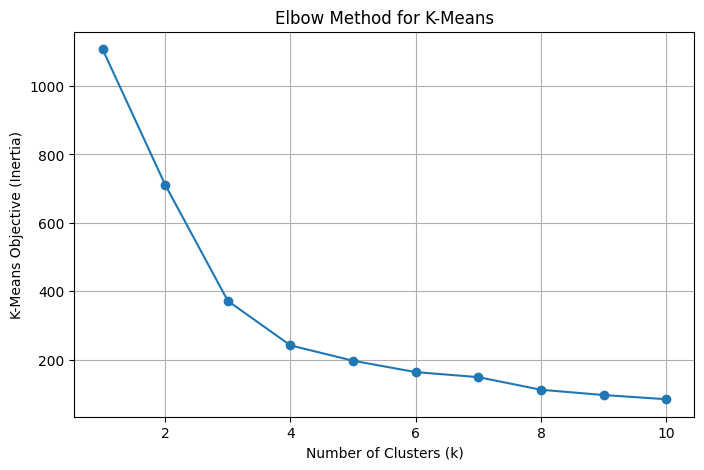

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random 2D samples uniformly in [-4, 4]
np.random.seed(42)
data = np.random.uniform(-4, 4, size=(100, 2))

# Compute inertia for k = 1..10
ks = range(1, 11)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

# Plot elbow graph
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("K-Means Objective (Inertia)")
plt.title("Elbow Method for K-Means")
plt.grid(True)
plt.show()

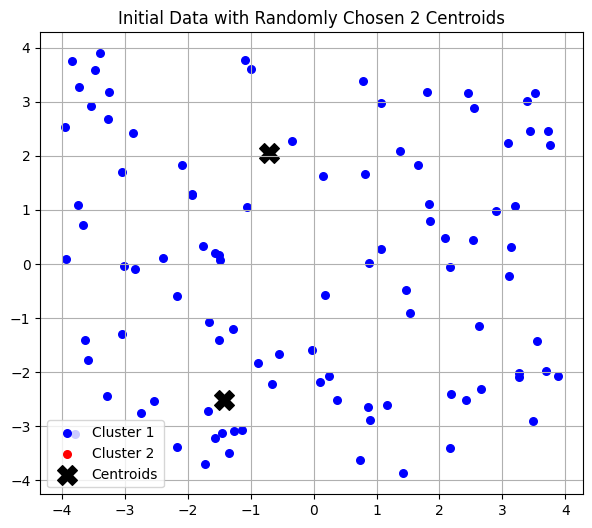

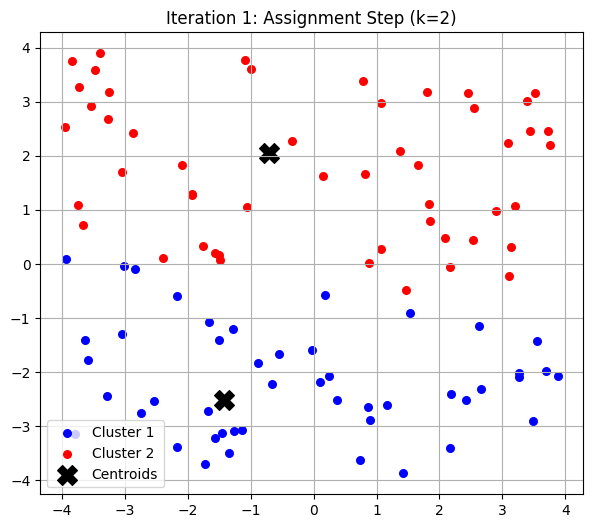

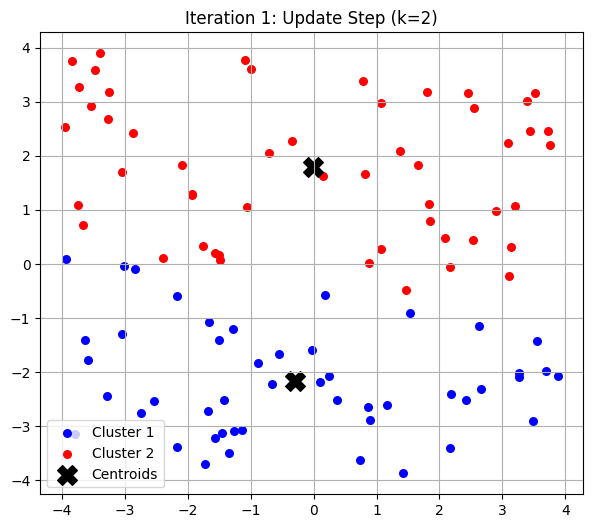

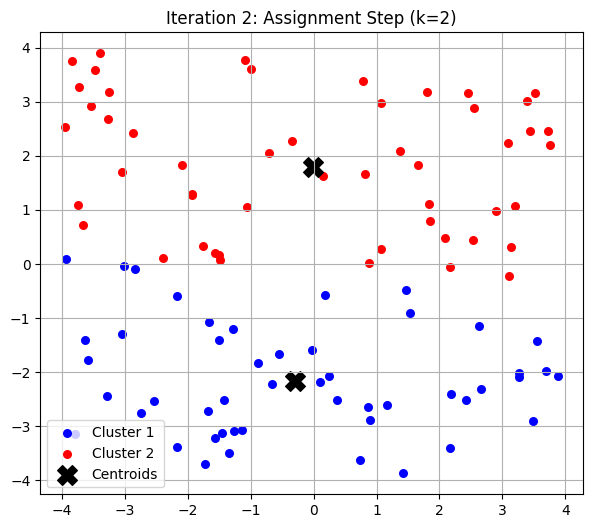

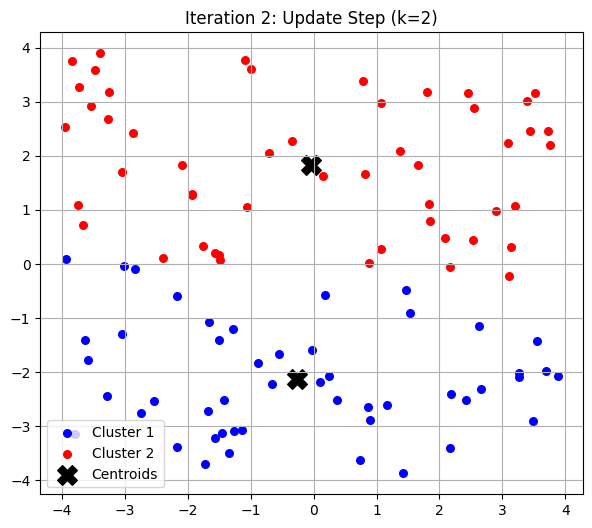

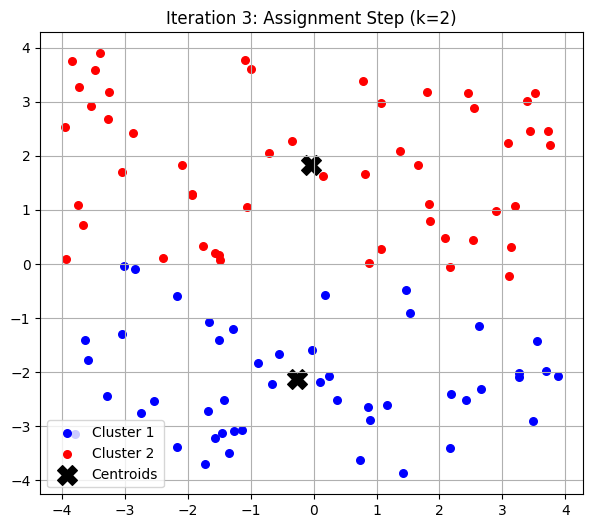

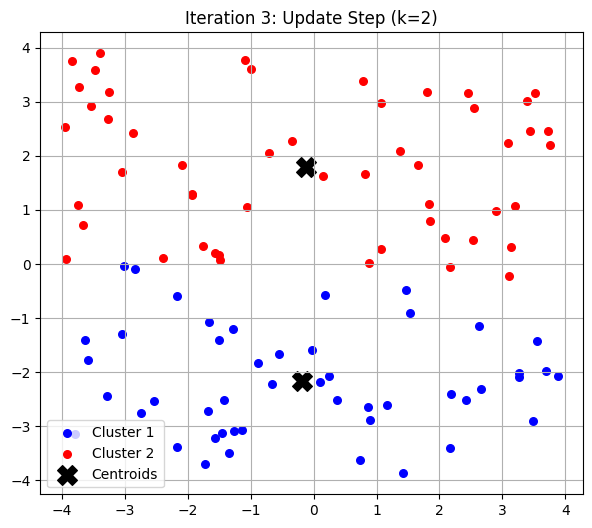

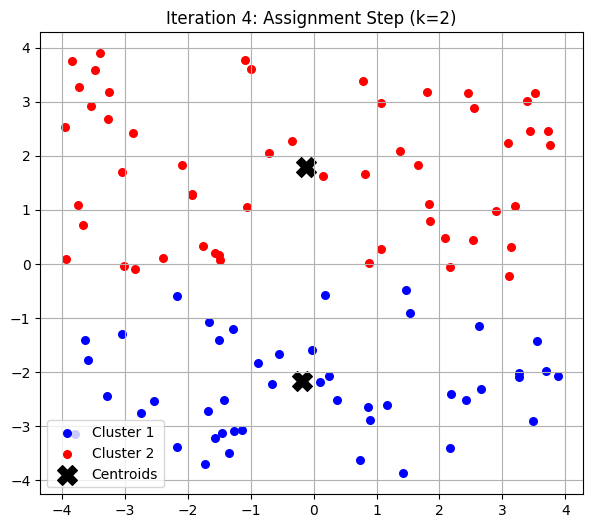

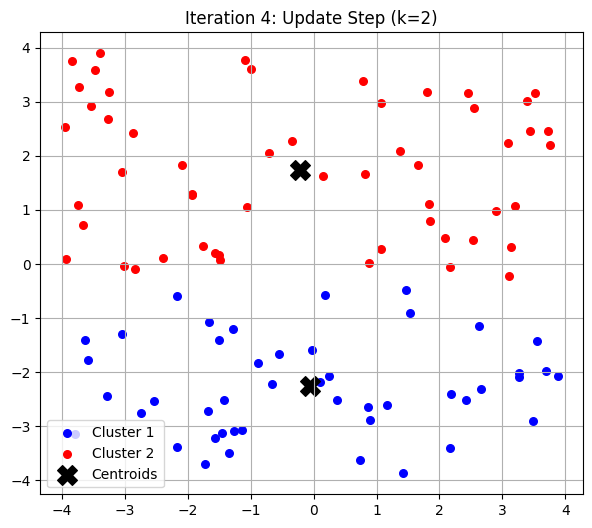

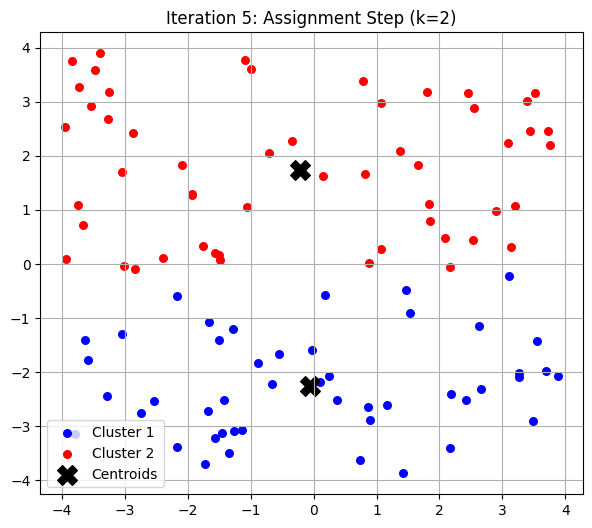

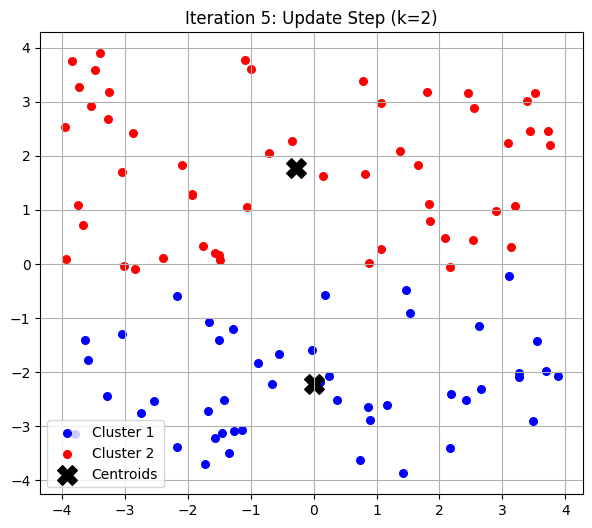

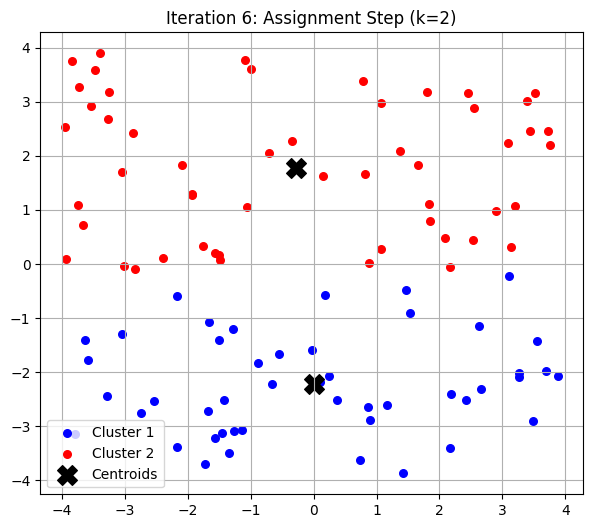

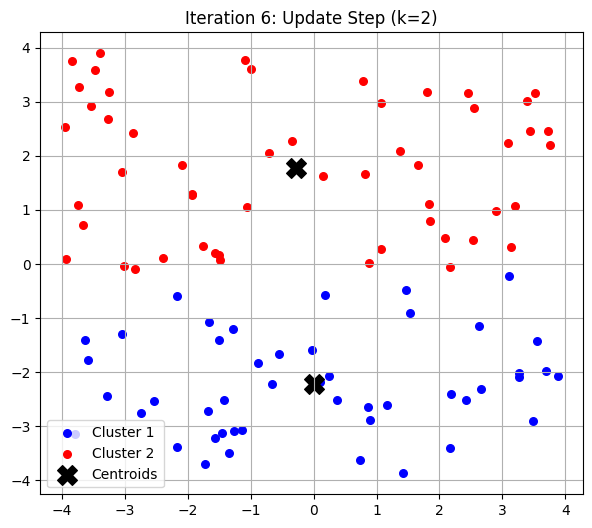

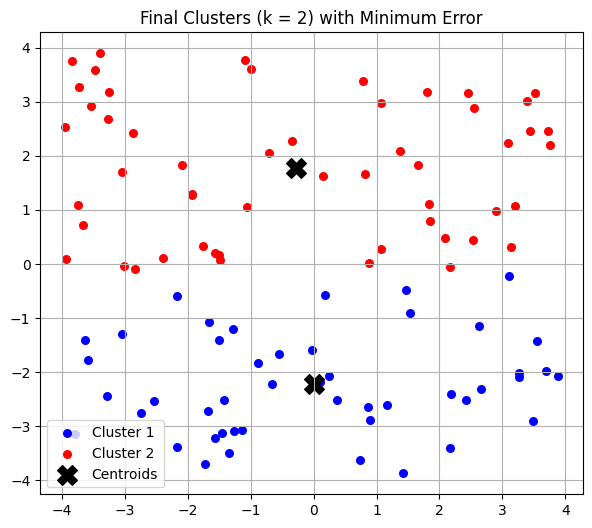

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Euclidean Distance
# ----------------------------
def euclid(a, b):
    return np.sqrt(np.sum((a - b)**2, axis=1))

# ----------------------------
# Plot Function (Red, Blue, Centroids)
# ----------------------------
def plot_clusters(data, labels, centroids, title):
    plt.figure(figsize=(7, 6))

    # Blue cluster
    plt.scatter(data[labels == 0, 0], data[labels == 0, 1],
                color='blue', s=30, label='Cluster 1')

    # Red cluster
    plt.scatter(data[labels == 1, 0], data[labels == 1, 1],
                color='red', s=30, label='Cluster 2')

    # Centroids (Black X)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='X', s=200, color='black', label='Centroids')

    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

# ----------------------------
# K-Means (k = 2 only)
# ----------------------------
def kmeans_two_centroids(data, max_iter=10):
    np.random.seed(42)

    # Pick exactly **2** random centroids from data
    idx = np.random.choice(len(data), 2, replace=False)
    centroids = data[idx]

    plot_clusters(data, np.zeros(len(data)), centroids,
                  "Initial Data with Randomly Chosen 2 Centroids")

    for it in range(max_iter):

        # Assignment step
        dist_c0 = euclid(data, centroids[0])
        dist_c1 = euclid(data, centroids[1])
        labels = (dist_c1 < dist_c0).astype(int)

        plot_clusters(data, labels, centroids,
                      f"Iteration {it+1}: Assignment Step (k=2)")

        # Update step: compute new centroids
        new_centroid_0 = data[labels == 0].mean(axis=0)
        new_centroid_1 = data[labels == 1].mean(axis=0)
        new_centroids = np.vstack((new_centroid_0, new_centroid_1))

        plot_clusters(data, labels, new_centroids,
                      f"Iteration {it+1}: Update Step (k=2)")

        # Convergence check
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Final result
    plot_clusters(data, labels, centroids,
                  "Final Clusters (k = 2) with Minimum Error")

    return labels, centroids

# ----------------------------
# Generate 100 Random Points
# ----------------------------
np.random.seed(42)
data = np.random.uniform(-4, 4, (100, 2))

# Run K-means with exactly 2 centroids
labels, final_centroids = kmeans_two_centroids(data)
